<a href="https://colab.research.google.com/github/MNoichl/opinionated/blob/master/opinionated_trial_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Slightly prettier plots in colab, the easy way

First, we make the standard plot. It's not that pretty... 😞

Text(0.5, 1.0, 'Some Data')

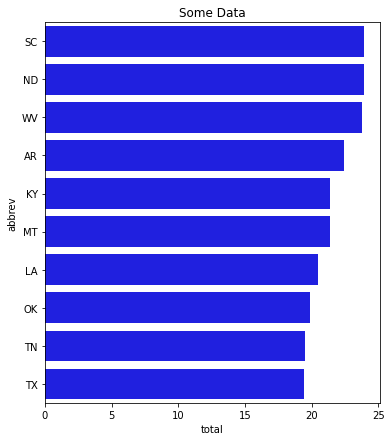

In [1]:
import seaborn as sns
from matplotlib import font_manager as fm, pyplot as plt
import shutil
import matplotlib

#Loading the data:

crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)[0:10]


f, ax = plt.subplots(figsize=(6, 7))
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total",color='b')
plt.title('Some Title')
ax.set_title('Some Data')

Then we download the custom stylesheet I made for Samuli. It's inspired by [this R-package](https://github.com/hrbrmstr/hrbrthemes). We also download all the google-fonts. This is somewhat overkill, and takes half a minute but why not... 😎


In [2]:
!pip install git+https://github.com/MNoichl/opinionated.git#egg=opinionated

import opinionated
plt.style.use("opinions")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/MNoichl/opinionated.git to /tmp/pip-install-tpx5nfue/opinionated_8efe63a5b37f44e99c09ddaaa3a95bb8
  Running command git clone --filter=blob:none --quiet https://github.com/MNoichl/opinionated.git /tmp/pip-install-tpx5nfue/opinionated_8efe63a5b37f44e99c09ddaaa3a95bb8
  Resolved https://github.com/MNoichl/opinionated.git to commit 41144ad28210dc7526137270152289406098720d
  Preparing metadata (setup.py) ... done
  Created wheel for opinionated: filename=opinionated-0.0.1+dirty-py3-none-any.whl size=3667 sha256=0351f4364a2321b505b7c85e41c954ee8876d3d8f67f4123f3b8680458736ea8
  Stored in directory: /tmp/pip-ephem-wheel-cache-092mo6g4/wheels/d2/14/71/09afceeaa7ad5cc0dc1ad3790ff1bef4d362715f0b1656679d
Successfully built opinionated
Font saved to: /usr/local/lib/python3.8/dist-packages/opinionated/fonts
Font saved to: /usr/local/lib/python3.8/dist-packages/opinionated

Then we do the exact same thing as above again, but change the color, and add a little transparancy...

The result is by no means perfect, but isn't it already a lot prettier? 🤩

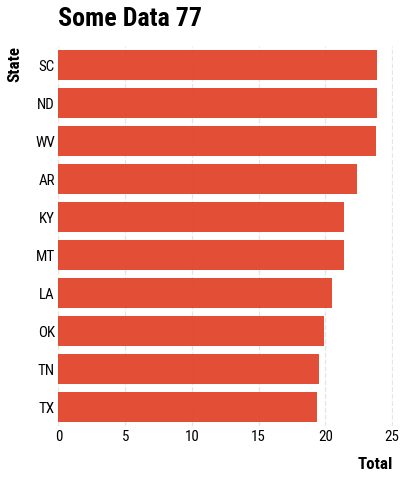

In [4]:


f, ax = plt.subplots(figsize=(6, 7))

# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
plt.rc('font', family='Roboto Condensed') 

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data 77')
ax.set_ylabel("State")
ax.set_xlabel("Total")
plt.show()
# Now lets save with good defaults:
# plt.savefig('my_sample_plot.png',bbox_inches='tight',dpi =400, transparent=False)

That's it! If you have ideas for how to improve the stylesheet, please tell me!

In [5]:

from opinionated.core import download_googlefont
download_googlefont('Lobster', add_to_cache=True)

Font saved to: /usr/local/lib/python3.8/dist-packages/opinionated/fonts


In [6]:
from opinionated.core import show_installed_fonts
show_installed_fonts()


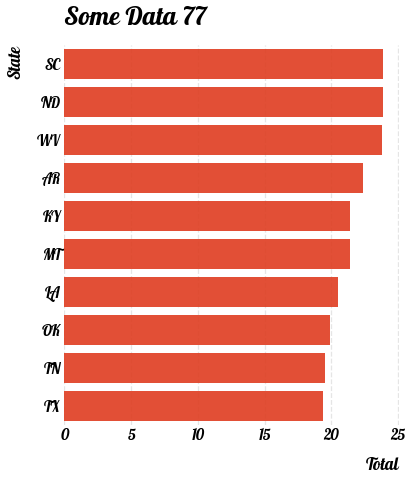

In [8]:


f, ax = plt.subplots(figsize=(6, 7))

# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
plt.rc('font', family='Lobster') 

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data 77')
ax.set_ylabel("State")
ax.set_xlabel("Total")
plt.show()
# Now lets save with good defaults:
# plt.savefig('my_sample_plot.png',bbox_inches='tight',dpi =400, transparent=False)

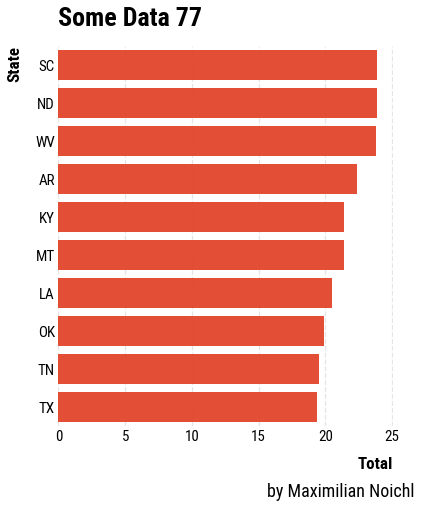

In [27]:


f, ax = plt.subplots(figsize=(6, 7))

# If you want even more of the hrbrthemes-feeling you can change the font to Roboto Condensed. 
# Sometimes you will need to call the plotting function multiple times for this to take effect.
# You should be able to put any google-font here:
plt.rc('font', family='Roboto Condensed') 

sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="#ff2500", alpha=.9)
ax.set_title('Some Data 77')
ax.set_ylabel("State")
ax.set_xlabel("Total")

def add_attribution(attrib = 'by me'):
  plt.figtext( .95, -0.015, attrib, ha="right", fontsize=18)#, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
add_attribution(attrib='by Maximilian Noichl')



plt.show()


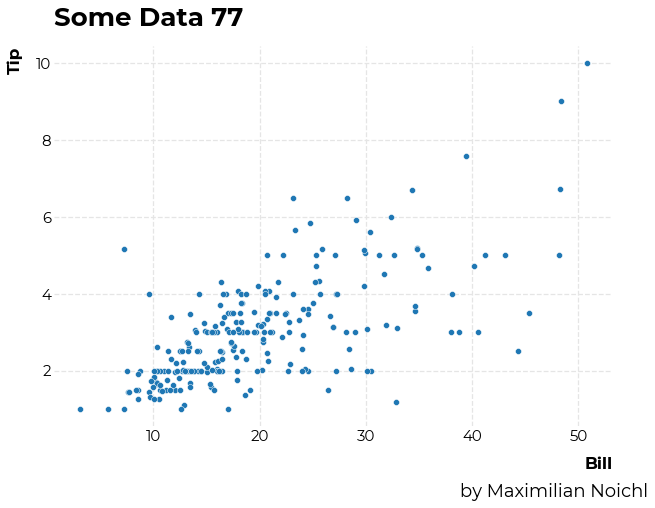

In [35]:
f, ax = plt.subplots(figsize=(10, 7))
tips = sns.load_dataset("tips")

plt.rc('font', family='Montserrat') 

sns.scatterplot(data=tips, x="total_bill", y="tip")

ax.set_title('Some Data 77')
ax.set_ylabel("Tip")
ax.set_xlabel("Bill")

def add_attribution(attrib = 'by me'):
  plt.figtext( .95, -0.015, attrib, ha="right", fontsize=18)
add_attribution(attrib='by Maximilian Noichl')



plt.show()
